# Time Series Segmentation with Hidalgo Segmentation

In this notebook, we will showcase `Hidalgo` for the task of time series segmentation. We illustrate the ease of use of Hidalgo, and present the found segmentation for a synthetic example.

# Prerequisites

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from aeon.segmentation import HidalgoSegmenter

sns.set_theme()
sns.set_color_codes()

# Generate Synthetic Data

In [2]:
# 100 time points, each with 3 channels.
X = np.random.rand(100, 3)
X[:60, 1:] += 10
X[60:, 1:] = 0

time = np.arange(len(X))

# Visualize Synthetic Data

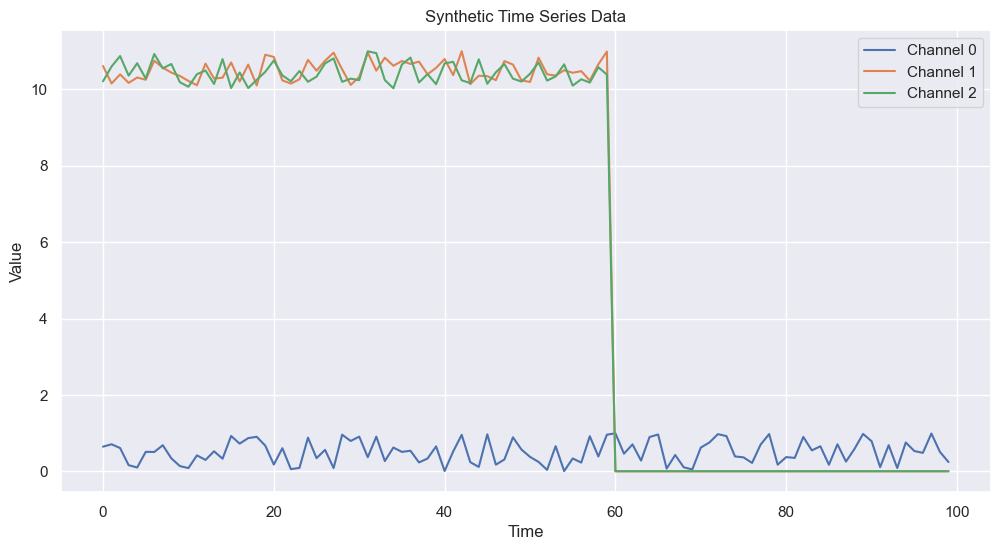

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time, X[:, 0], label="Channel 0")
ax.plot(time, X[:, 1], label="Channel 1")
ax.plot(time, X[:, 2], label="Channel 2")
plt.title("Synthetic Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Apply Hidalgo Segmentation


In [4]:
hidalgo = HidalgoSegmenter(K=2, q=3, n_iter=1000, burn_in=0.8, seed=10)

labels = hidalgo.fit_predict(X, axis=0)
print("Found change points:", labels)

Found change points: [-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


## Visualize Segmentation Output

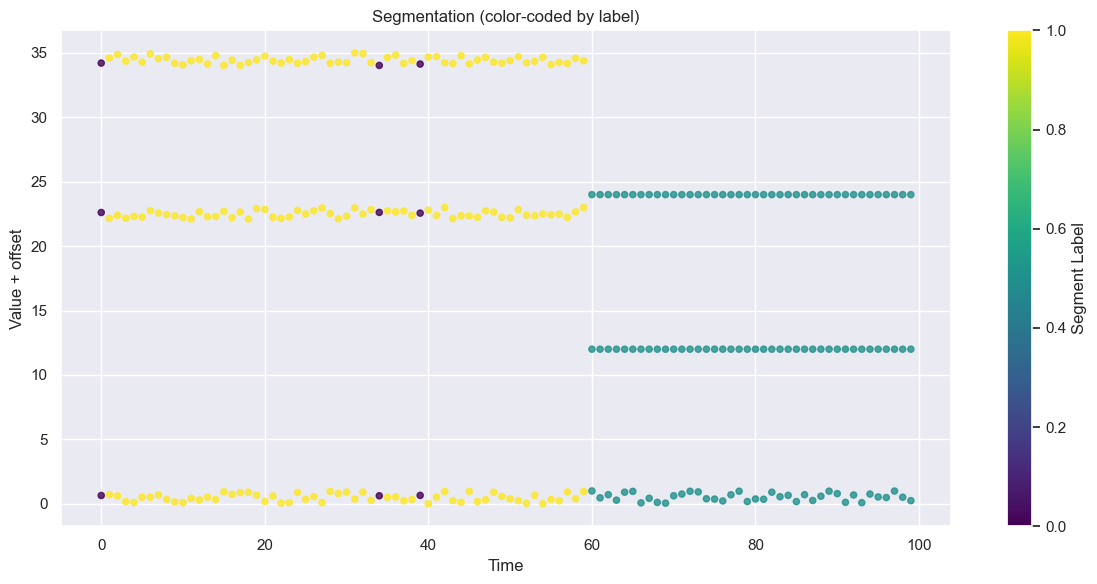

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
offsets = [0, 12, 24]
for ch in range(3):
    ax.scatter(time, X[:, ch] + offsets[ch], c=labels, cmap="viridis", s=20, alpha=0.8)
ax.set_title("Segmentation (color-coded by label)")
ax.set_xlabel("Time")
ax.set_ylabel("Value + offset")

scatter_ref = ax.scatter([], [], c=[], cmap="viridis")
cbar = plt.colorbar(scatter_ref, ax=ax)
cbar.set_label("Segment Label")

plt.tight_layout()
plt.show()